In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
%matplotlib ipympl

from shapely.geometry import Polygon
radius = 50
x,y=500,0
ang_arr = np.arange(0,2*np.pi,2*np.pi/6.0)
x_coords = x+radius*np.cos(ang_arr)
y_coords = y+radius*np.sin(ang_arr)
xy_tuple = [tuple([x_coords[i],y_coords[i]]) for i in range(6)]
drone_boundary = Polygon(xy_tuple)


In [3]:
plt.figure()
plt.scatter(x_coords,y_coords)
plt.show()

['POINT (550 0)', 'POINT (550 0)']
LINESTRING (450 0, 550 0)


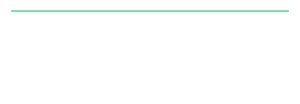

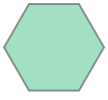

In [6]:
from shapely.geometry import LineString, Point, Polygon
from shapely.ops import nearest_points
ang = 0
x,y=30,0
# full line segment of the sensor's ray
x_end = x + (np.cos(ang) * 1300) 
y_end = y + (np.sin(ang) * 1300)

s_line = LineString([(x, y), (x_end, y_end)])
robot_min_dist = 1300
npts = [o.wkt for o in nearest_points(s_line,drone_boundary)]
print(npts)
if s_line.intersects(drone_boundary):
    intersection = s_line.intersection(drone_boundary)
    inter = np.array(intersection.coords)
    dist1 = np.linalg.norm(np.array([x,y])- inter[0])
    dist2 = np.linalg.norm(np.array([x,y])- inter[1])
    dist = min(dist1,dist2) 
    robot_min_dist = min(dist, robot_min_dist)

intersection = s_line.intersection(drone_boundary)
print(intersection)
display(s_line,drone_boundary)

In [5]:
def sensor_mapping(ang):
    num_sensors = 12
    # abgle seperation bw consecutive sensors
    angle_step = 2*np.pi/num_sensors
    # offset for compensating the first sensor being
    # symmetric w.r.t. 0 degree
    offset_angle = angle_step/2
    if ang<0:
        tmp_ang = ang - offset_angle
    else:
        tmp_ang = ang + offset_angle
    signed_sensor_indx = int(tmp_ang/angle_step)
    misalignment = abs((ang/angle_step-signed_sensor_indx)*angle_step)
    # index in [0,11]
    sensor_indx = signed_sensor_indx%num_sensors
    return sensor_indx, misalignment

    
sensor_indx, misalignment = sensor_mapping(-37*np.pi/180.0)
print(misalignment*180.0/np.pi)
print(sensor_indx)


7.000000000000001
11


In [28]:
ang = 30*np.pi/180.0
x,y=30,0
# full line segment of the sensor's ray
x_end = x + (np.cos(ang) * 1300) 
y_end = y + (np.sin(ang) * 1300)
s_line = LineString([(x, y), (x_end, y_end)])
robot_center = Point(x,y)

radius = 50
x,y=2000,0
ang_arr = np.arange(0,2*np.pi,2*np.pi/6.0)
x_coords = x+radius*np.cos(ang_arr)
y_coords = y+radius*np.sin(ang_arr)
xy_tuple = [tuple([x_coords[i],y_coords[i]]) for i in range(6)]
drone_boundary = Polygon(xy_tuple)
# collect coords tuples in an array
npts = [o.coords[0] for o in nearest_points(robot_center,drone_boundary)]
print(npts[1]) # indx of npts same as inputs of nearest_points()

(1950.0, 6.123233995736766e-15)
